In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Base

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ENIGMA/cubic_zirconia.csv')
df.shape

(26967, 11)

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
df.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)

In [ ]:
df.head()


,Id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       26967 non-null  int64  
 1   carat    26967 non-null  float64
 2   cut      26967 non-null  object 
 3   color    26967 non-null  object 
 4   clarity  26967 non-null  object 
 5   depth    26270 non-null  float64
 6   table    26967 non-null  float64
 7   x        26967 non-null  float64
 8   y        26967 non-null  float64
 9   z        26967 non-null  float64
 10  price    26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
df['price'] = df['price']/500

In [ ]:
base = df

In [ ]:
base.describe()

,Id,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,7.879036
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,8.049729
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,0.652000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,1.890000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,4.750000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,10.720000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,37.636000


# Noise

In [ ]:
df

,Id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,0.998
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,1.968
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,12.578
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,2.164
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,1.558
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,10.816
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,2.228
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,3.312
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,1.364


In [ ]:
df[df.carat != 0]['carat']

0        0.30
1        0.33
2        0.90
3        0.42
4        0.31
         ... 
26962    1.11
26963    0.33
26964    0.51
26965    0.27
26966    1.25
Name: carat, Length: 26967, dtype: float64

In [ ]:
df.carat

0        0.30
1        0.33
2        0.90
3        0.42
4        0.31
         ... 
26962    1.11
26963    0.33
26964    0.51
26965    0.27
26966    1.25
Name: carat, Length: 26967, dtype: float64

In [ ]:
def noisefn(column, mu, sigma):
  noise = np.random.normal(mu, sigma, [26967,])
  
  df[column] = df[column]+ noise

  df[df[column]<=0] = None

  

In [ ]:
noisefn('carat', 0, 0.1)


In [ ]:
noisefn('depth', 0, 5)

In [ ]:
noisefn('table', 0, 5)

In [ ]:
noisefn('x', 0, 1)
noisefn('y', 0, 1)
noisefn('z', 0, 1)

In [ ]:
df.isnull().sum()

Id          35
carat       35
cut         35
color       35
clarity     35
depth      730
table       35
x           35
y           35
z           35
price       35
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
noiseddf = df

In [ ]:
noiseddf.describe()

,Id,carat,depth,table,x,y,z,price
count,26237.000000,26237.000000,26237.000000,26237.000000,26237.000000,26237.000000,26237.000000,26237.000000
mean,13486.821321,0.799017,61.767964,57.467779,5.729795,5.726076,3.542744,7.880681
std,7783.061092,0.486625,5.175064,5.479698,1.511996,1.539580,1.210483,8.044117
min,1.000000,0.001237,41.152663,36.708297,0.526739,0.371026,0.007906,0.652000
25%,6740.000000,0.410199,58.317888,53.769329,4.646155,4.650666,2.700398,1.890000
50%,13500.000000,0.689530,61.769284,57.451267,5.675217,5.665531,3.520285,4.752000
75%,20225.000000,1.077579,65.166410,61.065259,6.750885,6.758159,4.351904,10.726000
max,26967.000000,4.681667,83.419810,80.452832,11.851216,60.400395,8.248677,37.636000


# Cleaning

In [ ]:
meta=pd.read_excel('/content/drive/MyDrive/ENIGMA/Data Dictionary.xlsx')

In [ ]:
meta[['Description']]

,Description
0,Carat weight of the cubic zirconia.
1,Describe the cut quality of the cubic zirconi...
2,Colour of the cubic zirconia.With D being the...
3,cubic zirconia Clarity refers to the absence ...
4,"The Height of a cubic zirconia, measured from..."
5,The Width of the cubic zirconia's Table expre...
6,the Price of the cubic zirconia.
7,Length of the cubic zirconia in mm.
8,Width of the cubic zirconia in mm.
9,Height of the cubic zirconia in mm.


In [ ]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print(f'before removing duplicates{df.shape}')
df.drop_duplicates(inplace=True)
print(f'after removing duplicates{df.shape}')

before removing duplicates(26221, 11)
after removing duplicates(26221, 11)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


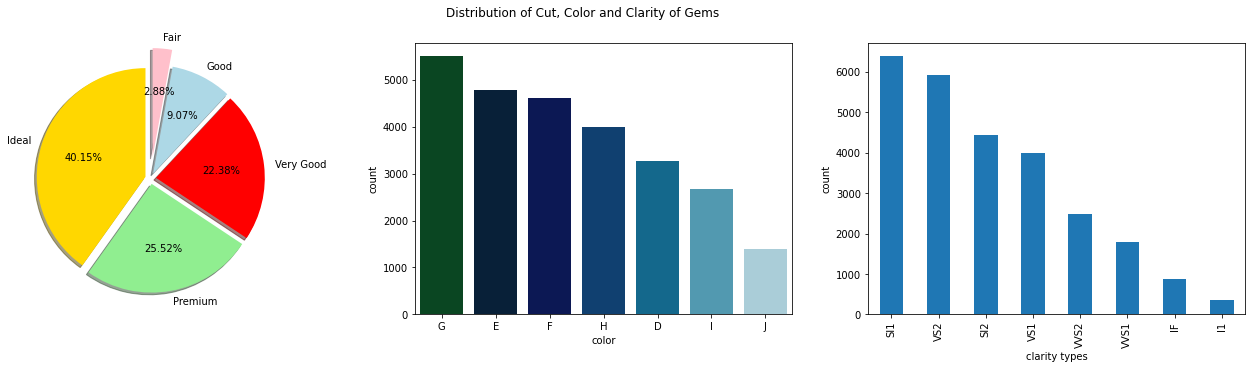

In [ ]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

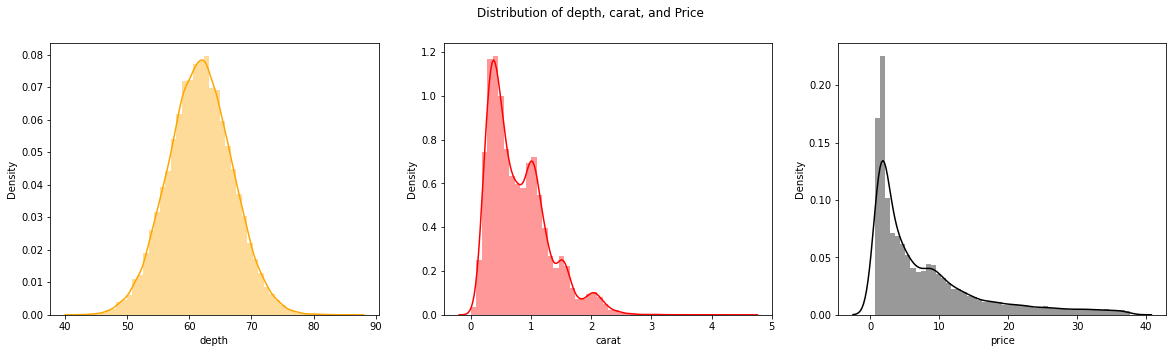

In [ ]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['depth'], color='orange')

plt.subplot(132)
sns.distplot(df['carat'], color='red')

plt.subplot(133)
sns.distplot(df['price'], color='black')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


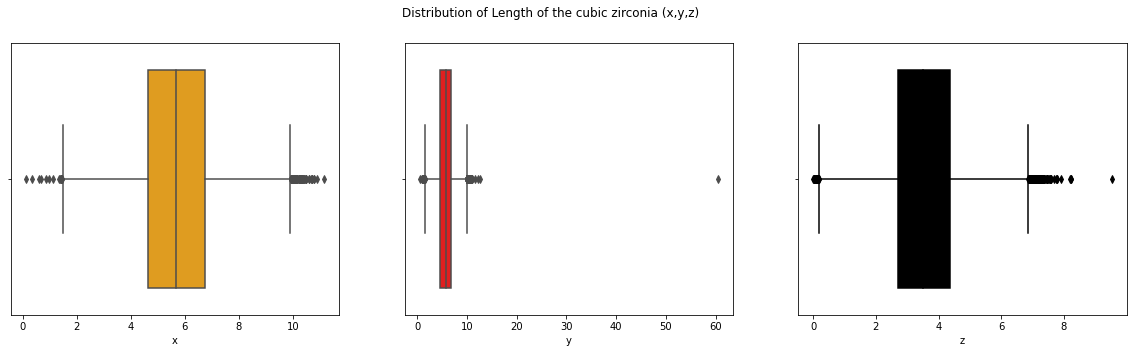

In [ ]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['x'], color='orange')

plt.subplot(132)
sns.boxplot(df['y'], color='red')

plt.subplot(133)
sns.boxplot(df['z'], color='black')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

In [ ]:
df['cut']=df['cut'].replace(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal'), (1,2,3,4,5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
colors_dummies=pd.get_dummies(df['color'], drop_first=True)
clarity_dummies=pd.get_dummies(df['clarity'], drop_first=True)

In [ ]:
dummies=pd.concat([colors_dummies, clarity_dummies], axis=1)

In [ ]:
df=pd.concat([df, dummies], axis=1)

In [ ]:
df.drop(['color', 'clarity'], axis=1, inplace=True)

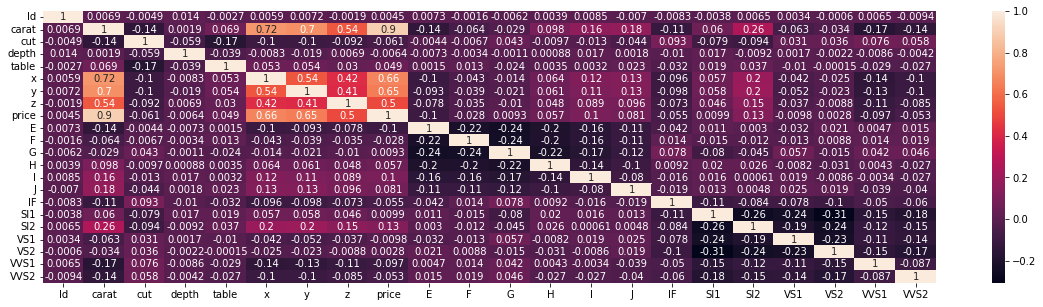

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns = ['price'])
Y = df['price']

In [ ]:
X

,Id,carat,cut,depth,table,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,1.0,0.229181,5,63.509269,59.358044,1,0,0,0,0,0,0,1,0,0,0,0,0
1,2.0,0.370014,4,54.014226,48.454679,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3.0,0.940244,3,63.742583,63.642185,1,0,0,0,0,0,0,0,0,0,0,0,1
3,4.0,0.349048,5,60.781453,59.407866,0,1,0,0,0,0,0,0,0,1,0,0,0
4,5.0,0.282015,5,62.905509,58.173709,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,26963.0,0.989829,4,67.799635,60.440421,0,0,1,0,0,0,0,1,0,0,0,0,0
26963,26964.0,0.342537,5,68.584323,54.236651,0,0,0,1,0,0,1,0,0,0,0,0,0
26964,26965.0,0.362285,4,56.099584,55.228246,1,0,0,0,0,0,0,0,0,0,1,0,0
26965,26966.0,0.211699,3,64.487303,56.032534,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
Y

0         0.998
1         1.968
2        12.578
3         2.164
4         1.558
          ...  
26962    10.816
26963     2.228
26964     3.312
26965     1.364
26966    10.332
Name: price, Length: 26221, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

4.952272741684319

# Save

In [ ]:
noisex = noiseddf[:15000].drop(['price', 'Id'], axis=1)
noisey = noiseddf[:15000]['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
nx_train, nx_test, ny_train, ny_test = train_test_split(noisex, noisey, test_size=0.2, random_state=42)

In [ ]:
nx_test.index = np.arange(0, 3000)

In [ ]:
nx_test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.136542,Ideal,E,VVS1,53.580195,50.662146,5.078804,1.893405,0.283778
1,0.528934,Ideal,H,VVS1,56.039564,58.315195,6.901560,4.694186,3.803880
2,0.818501,Very Good,I,VS1,58.287214,58.878251,5.282745,5.514879,4.377075
3,1.411504,Premium,H,SI1,63.240206,61.764862,6.863968,9.117281,5.220630
4,1.052036,Fair,J,SI2,46.715415,66.960371,6.725186,4.191414,3.642572
...,...,...,...,...,...,...,...,...,...
2995,0.372864,Ideal,E,VVS2,58.553707,50.438915,6.526824,4.468635,3.213217
2996,0.295339,Very Good,F,SI1,54.340962,57.051567,4.966836,3.510724,3.014146
2997,0.506524,Good,F,VVS2,62.533965,68.258620,5.656203,4.301152,4.219405
2998,2.183475,Ideal,I,SI2,63.805363,53.965803,7.994936,8.969361,4.001043


In [ ]:
nx_test.shape

(3000, 9)

In [ ]:
nx_test.to_csv('/content/drive/MyDrive/ENIGMA/Final/test.csv', index=False)

In [ ]:
ny_test.index = np.arange(0, 3000)

In [ ]:
ny_test.head()

0     3.638
1     6.412
2     3.430
3     0.954
4    12.500
Name: price, dtype: float64

In [ ]:
ny_test.to_csv('/content/drive/MyDrive/ENIGMA/Final/solution.csv', index=True)

In [ ]:
c = nx_train.merge(ny_train.to_frame(), left_index=True, right_index=True)

In [ ]:
c.index = np.arange(0, 12000)

In [ ]:
c

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.392903,Very Good,G,VVS1,61.603032,58.540405,6.508248,4.880932,3.846798,4.010
1,0.234710,Very Good,E,VVS1,62.055809,57.444859,4.667125,5.402777,1.000976,0.970
2,1.159643,Ideal,G,SI2,64.693026,66.176975,6.331696,7.977875,4.854092,10.602
3,0.268142,Very Good,E,VVS1,57.466800,60.157288,2.347533,6.081028,0.823359,1.096
4,1.155944,Ideal,E,VVS2,64.971067,51.811746,6.421264,6.697644,3.984041,21.024
...,...,...,...,...,...,...,...,...,...,...
11995,0.424530,Ideal,D,SI1,61.100066,50.123061,5.677360,3.863762,3.356044,3.138
11996,0.511576,Ideal,D,VVS1,52.703718,53.109902,5.692166,6.894732,3.542798,8.084
11997,0.416688,Ideal,G,VVS1,61.628732,56.023208,3.908924,6.039973,2.194954,2.102
11998,0.297122,Ideal,J,VS1,68.620086,59.583594,4.961906,3.683685,2.874971,1.290


In [ ]:
c.to_csv('/content/drive/MyDrive/ENIGMA/Final/train.csv', index=False)

In [ ]:
sample = base[15000:18002]

In [ ]:
sample = sample[['Id', 'price']]

In [ ]:
sample = sample.dropna()

In [ ]:
sample.shape

(3000, 2)

In [ ]:
sample['Id'] = np.arange(0, 3000)

In [ ]:
sample


,Id,price
15000,0,1.806
15001,1,13.124
15002,2,2.882
15003,3,2.854
15004,4,36.228
...,...,...
17997,2995,1.904
17998,2996,3.874
17999,2997,7.960
18000,2998,1.866


In [ ]:
sample.to_csv('/content/drive/MyDrive/ENIGMA/Final/sample_submission.csv', index=False)